In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import learning.utils as ut

system_name = 'dql_const'
run_name = 'state_of_art1'
data_dir = './data/' + system_name + '/' + run_name + '/'

#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [7]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 300.0
learning_step 0.2
penalty 15.0
wind_type const
v_wind_x 10.0
v_wind_y 0.0
v_wind_z 0.0
learning_type dql
gamma 1.0
episodes 500.0
eta0 0.001
eta_decay_start 1000000.0
eta_decay_rate 0.9
eta_c 1000.0
eps0 0.01
eps_decay_start 4000000.0
eps_decay_rate 0.6
eps_c 100.0
optimizer sgd
loss mse
buffer_size 1.0
batch_size 1.0
max_power 0.0


In [8]:
# read durations and returns
d_traj, r_traj = ut.read_traj(data_dir+'/return.txt')

l_steps = np.cumsum(d_traj)
print(l_steps)

[     8     73    157    194    353    422    600    678    718   2218
   2249   2305   2346   2361   3269   3307   3324   3336   3357   3359
   4493   4579   4751   5117   5119   6619   6724   7023   8523   8547
   9327  10827  10831  11852  11862  11882  11913  12114  12152  12155
  12183  12211  12302  13043  14543  14977  14979  16479  17979  19479
  20979  22479  23286  24786  26228  27728  29228  30728  32228  32232
  33732  35232  36732  37480  38655  40155  41655  41658  43066  44566
  46066  47566  47591  48967  50467  51790  53290  54790  54793  56293
  57793  59293  59655  59677  59679  61033  62114  63478  64978  66478
  67872  69372  70496  71633  73133  74633  76133  77561  79061  80561
  82061  83561  84906  84944  86444  87944  89444  90944  92406  92411
  93627  94820  96320  96323  96648  98148  99648 101148 102648 104148
 105648 107148 108256 109625 111125 112625 114045 115545 117045 118545
 120045 121545 121547 123047 124164 125664 127164 128664 129073 129113
 13061

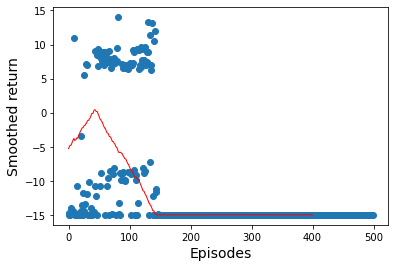

In [9]:
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(r_traj, 'o')

smooth = np.convolve(r_traj, np.ones(100), "valid")/100
plt.plot(smooth, color='red', lw=1)

plt.savefig(data_dir+'return.png', dpi=200)
plt.show()

[-15.         -14.99999993 -14.99999925 -14.99999924 -14.99999814
 -14.99999813 -14.99999813 -14.99999812 -14.99999314 -14.9999931
 -14.99999172 -14.99942512 -14.9994246  -14.99942452 -14.9994245
 -14.99942422 -14.99942417 -14.99942408 -14.9994004  -14.99940034
 -14.99929872 -14.99929861 -14.99929849 -14.99913257 -14.99913232
 -14.99913213 -14.99913185 -14.99913154 -14.9978476  -14.99775785
 -14.9977565  -14.99622133 -14.99617954 -14.9961791  -14.99617908
 -14.99617115 -14.996171   -14.99615811 -14.99613413 -14.9961337
 -14.99612183 -14.99610782 -14.99606733 -14.99606667 -14.99604849
 -14.99604814 -14.99597796 -14.99477308 -14.99474316 -14.99461427
 -14.99460402 -14.99459727 -14.99454422 -14.99444743 -14.99442786
 -14.99438918 -14.99434907 -14.99429507 -14.99424792 -14.99422838
 -14.99414318 -14.99408301 -14.99386283 -14.99374824 -14.99343087
 -14.99340444 -14.99340414 -14.99335621 -14.99335608 -14.99325345
 -14.99314201 -14.99307724 -14.9930767  -14.99301741 -14.99300657
 -14.99294915

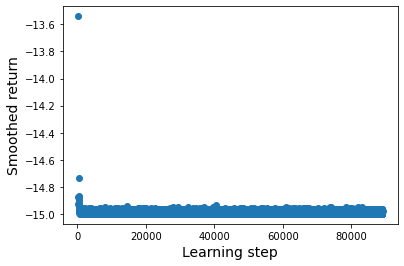

In [5]:
plt.xlabel('Learning step', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)
print(np.unique(r_traj))
plt.plot(l_steps, r_traj, 'o')

#smooth = np.convolve(r_traj, np.ones(100))/100
#plt.plot(l_steps, smooth, color='red', lw=3)

plt.show()

(150001, 15, 7, 3, 3)
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


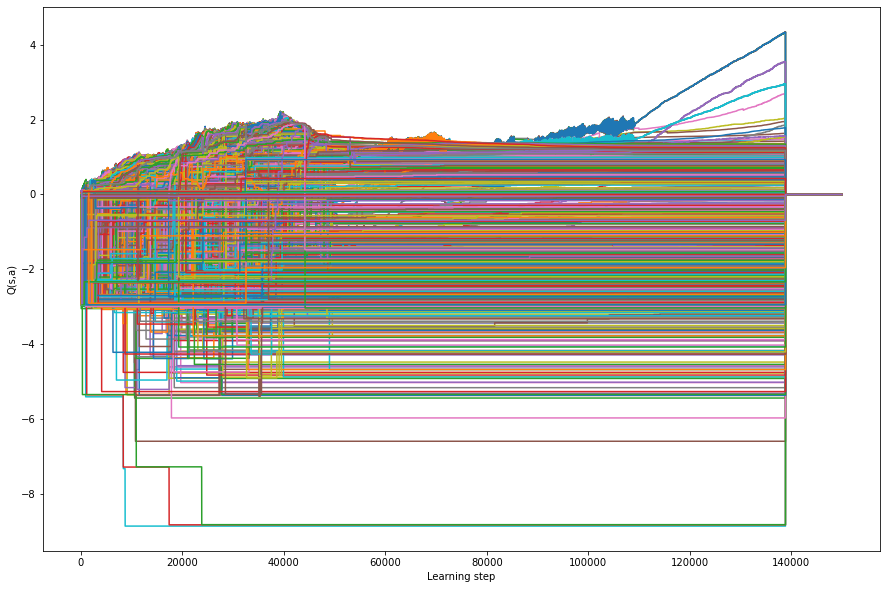

(5, 0, 0, 0)


In [743]:
Q_traj = np.load(data_dir+"quality_traj.npy")
print(Q_traj.shape)

Q_traj = Q_traj.reshape(Q_traj.shape[0], -1)
#print(Q_traj.shape)

plt.figure(figsize = (15,10))
for i in range(Q_traj.shape[1]):
#for i in [315]:
    plt.plot(Q_traj[::1,i], '-')
print(np.unravel_index(np.where(Q_traj[0]>16.5)[0], (15,7,3,3)))
plt.ylabel("Q(s,a)")
plt.xlabel("Learning step")
plt.savefig(data_dir+"quality_traj.png")
plt.show()
print(np.unravel_index(315, (15,7,3,3)))

In [689]:
import torch
torch.rand(5,5)[:-2]

tensor([[0.6791, 0.6592, 0.7517, 0.7254, 0.0858],
        [0.1306, 0.3954, 0.6316, 0.4046, 0.2495],
        [0.0898, 0.0292, 0.4507, 0.7064, 0.1572]])

In [634]:
np.argsort(-Q_traj[-2])

array([252, 258, 315, 378, 321, 261, 384, 324, 189, 162, 270, 441, 288,
       387, 648, 666, 267, 846,  99,  45, 279, 810, 126, 459,   0, 801,
       495, 603, 828, 396,   9, 216,  90, 153, 729, 864, 774, 549,  54,
       576, 747, 927, 783, 702, 330, 207, 873, 900, 837, 225,  81, 567,
       684, 234,  27, 108, 351, 117, 195, 171, 792, 738, 168, 513, 765,
       918, 756, 342,  63, 936,  36, 585, 276, 423, 639, 711, 693, 198,
       675, 447, 450, 558, 477, 135, 486,  18, 504, 405, 333, 522, 369,
       612, 891, 297, 630, 414, 294, 393, 360, 654, 468, 243, 672, 432,
       657, 621, 819, 852, 855, 882,  72, 531, 105, 594,  51, 909, 816,
       144, 285, 132, 180, 807, 465, 501,   6, 609, 834, 306, 222, 720,
       402,  96,  15, 780, 735, 540, 159, 582, 753, 555,  60, 933, 870,
       708, 213, 231, 789, 879, 690,  87, 843, 906, 240, 114,  33, 177,
       123, 573, 519, 357, 744, 798, 924, 771, 348,  69, 762, 942,  42,
       717, 429, 645, 591, 681, 699, 204, 141, 564,  24, 456, 48

In [636]:
np.unravel_index(315, (15,7,3,3))

(5, 0, 0, 0)

In [529]:
Q_traj[-2]

array([ 2.15204805e-02, -2.11206172e-02,  4.78516612e-03,  1.19567020e-02,
       -2.09355578e-02, -2.37459429e-02,  6.38690144e-02,  5.20869344e-03,
        2.86460686e-02,  3.79391834e-02, -6.58371393e-03,  3.30936885e-03,
        2.26558577e-02, -1.43574914e-02, -1.45102879e-02,  3.29327732e-02,
        8.88034818e-04,  1.77001767e-02,  1.10998666e-02, -3.94785590e-03,
        1.27858936e-03,  6.42954279e-03, -5.44082839e-03, -5.59040625e-03,
        1.41397119e-02,  5.90523239e-04,  6.96304534e-03,  1.07115181e-02,
       -1.11123668e-02,  3.49194417e-03,  7.19226338e-03, -9.77131166e-03,
       -1.13288602e-02,  2.92954464e-02,  5.66343963e-03,  1.49531337e-02,
        1.84105653e-02, -5.22929663e-03,  1.79883221e-03,  1.05802212e-02,
       -7.06903590e-03, -6.91259559e-03,  1.73805729e-02,  8.05086223e-04,
        9.08149872e-03,  1.37961814e-02, -8.77491105e-03,  1.99340307e-03,
        9.58276168e-03, -1.15466611e-02, -1.18855834e-02,  3.06534581e-02,
        2.64342828e-03,  

In [390]:
print(Q_traj[23])

[-8.01200196e-02 -6.23032935e-02  7.08861426e-02 -8.01245719e-02
  8.59576687e-02  5.64475432e-02  2.52074227e-02 -6.88933730e-02
  1.60060078e-02  3.06336358e-02 -4.44923863e-02  1.40430778e-03
  1.25314295e-02  5.45168668e-03 -4.45839055e-02 -3.88501585e-03
 -9.07983035e-02 -6.87588453e-02 -4.74253856e-02 -1.86311156e-02
  2.39490047e-02  7.45102540e-02 -3.46740633e-02 -6.14173338e-02
  9.71913710e-02 -7.74632841e-02 -4.19387445e-02  5.06117269e-02
 -4.56308648e-02 -7.69285187e-02 -7.90566206e-02 -5.51479459e-02
 -7.85043165e-02  4.38386276e-02  2.51415893e-02  7.16298297e-02
 -9.66764987e-02 -6.46222830e-02  3.39891762e-03  3.71424183e-02
 -1.50186494e-02 -7.07396567e-02  2.73789465e-03  5.37099615e-02
 -8.10789466e-02 -7.72016197e-02  5.86106554e-02 -5.28184138e-02
  1.37247443e-02 -9.61970538e-03 -6.03200980e-02 -3.33667472e-02
  1.62900090e-02  4.14363518e-02 -1.60255283e-03  8.96440968e-02
 -1.35011822e-02  8.07376578e-02 -7.38925934e-02 -4.69868816e-02
 -5.18087074e-02  5.17715

In [71]:
Q_traj[100000].shape

IndexError: index 100000 is out of bounds for axis 0 with size 30001

In [ ]:
print(np.where(Q_traj[100000]>16)[0])

In [10]:
input=np.zeros(105)
S_t=(10, 3)
input[S_t[0]*15+S_t[1]]=1

IndexError: index 153 is out of bounds for axis 0 with size 105

In [553]:
import torch
torch.nn.functional.one_hot(torch.tensor([1*7+4]), num_classes=105).reshape(15, 7)

tensor([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])

[2.26406128e+02 2.25624451e+02 2.26054398e+02 2.25639404e+02
 2.25960693e+02 2.26273468e+02 2.25422882e+02 2.25281616e+02
 2.23740112e+02 1.63900945e-03 2.21278107e+02 2.22678696e+02
 2.25575546e+02 2.23007294e+02 2.24323425e+02 2.23453079e+02
 2.22323715e+02 2.22166412e+02 2.22947937e+02 2.21284607e+02
 2.21952866e+02 2.21785385e+02 2.20909058e+02 2.21347565e+02
 2.17127182e+02 4.02121572e-04 2.21791504e+02 2.20598083e+02
 6.64286606e-04 2.24184204e+02 2.24886917e+02 1.74562214e-03
 2.21436005e+02 2.22111237e+02 2.20427353e+02 2.22135757e+02
 2.18149872e+02 2.20325302e+02 2.19640701e+02 2.19122040e+02
 2.19133286e+02 2.14906067e+02 2.19022110e+02 2.19444855e+02
 1.16067205e-03 2.19666489e+02 2.17163467e+02 1.29501102e-02
 2.61751073e-03 1.21001294e-03 3.68793466e-04 1.88844890e-04
 2.21637939e+02 3.90180903e-05 2.25679855e+02 3.34972981e-04
 2.26147167e-05 6.11032068e-04 1.14003364e-02 2.18186188e+02
 2.90844269e-04 1.64136395e-03 2.70084781e-03 2.21194183e+02
 2.20547577e+02 3.660577

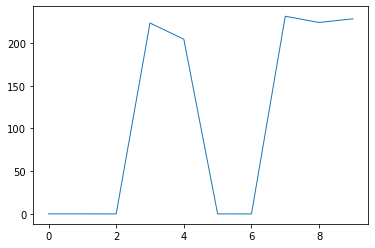

In [12]:
l = np.load(data_dir+"loss_traj.npy")
print(l)
plt.plot(l[135:145], lw=1)
plt.show()

In [74]:
Q = np.load(data_dir+"best_quality.npy")
#ind = np.argmax(Q_traj[4800])
#np.unravel_index(ind, Q.shape)

FileNotFoundError: [Errno 2] No such file or directory: './data/dql_const/state_of_art/best_quality.npy'

In [75]:
beta_importance=np.mean(np.var(Q, axis=2))

In [76]:
np.var(Q, axis=0).shape

(7, 1, 3, 3)

In [77]:
beta_importance

0.0

In [78]:
np.var(Q)

0.24340283029431797

In [79]:
att_importance=np.mean(np.var(Q, axis=0))
bank_importance=np.mean(np.var(Q, axis=1))
print(att_importance, bank_importance)

0.19595938513112895 0.19133971057069318


[25.          0.         43.30127019]


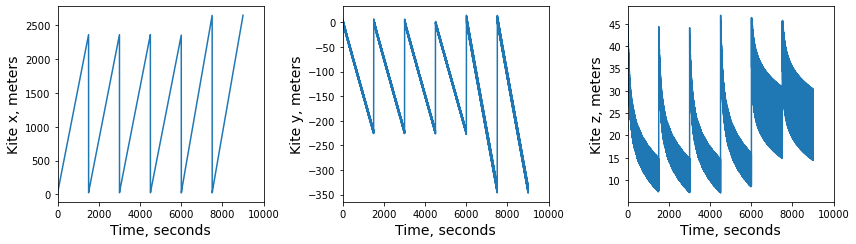

In [109]:
coordinates = np.load(data_dir+"eval_traj.npy")
controls = np.load(data_dir+"contr_traj.npy")
print(coordinates[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(coordinates[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(coordinates[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(coordinates[:,2])

plt.tight_layout()
plt.savefig(data_dir+"eval_traj.png", dpi=200)
plt.show()

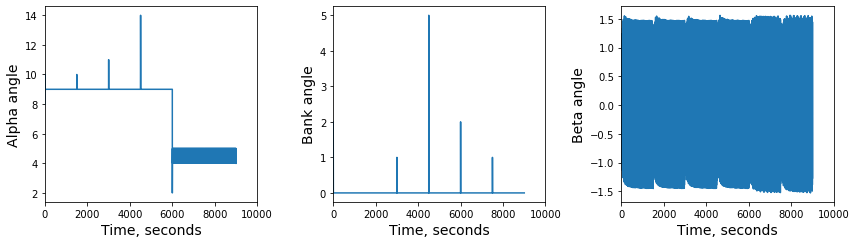

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Alpha angle', fontsize=14)
ax1.plot(controls[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.plot(controls[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Beta angle', fontsize=14)
ax3.plot(controls[:,2])

plt.tight_layout()
plt.savefig(data_dir+"contr_traj.png", dpi=200)
plt.show()

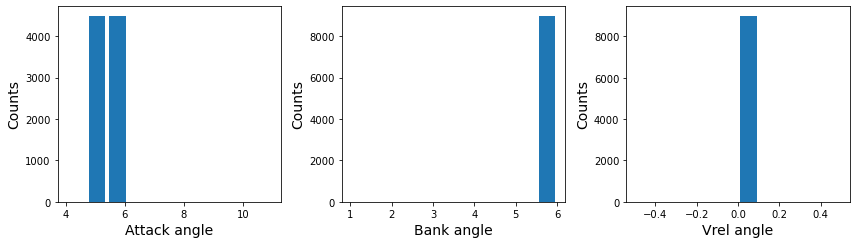

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.hist(controls[:,0], align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.hist(controls[:,1], align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
ax3.hist(controls[:,2], align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(data_dir+"contr_hist.png", dpi=200)
plt.show()